In [58]:
import re
import numpy as np
import pandas as pd
import spacy
import string
import matplotlib.pyplot as plt
import seaborn as sns
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline


In [6]:
file = pd.read_csv('text_classifier.csv', usecols=['id', 'title', 'text', 'Tags'])

In [7]:
file.head()

id  \
0  https://hackernoon.com/whats-the-best-smartpho...   
1  https://hackernoon.com/whats-the-best-smartpho...   
2  https://hackernoon.com/whats-the-best-smartpho...   
3  https://hackernoon.com/whats-the-best-smartpho...   
4  https://hackernoon.com/blockchain-what-the-hel...   

                                               title  \
0  What the Best Smartphone for keeping your Conv...   
1  What the Best Smartphone for keeping your Conv...   
2  What the Best Smartphone for keeping your Conv...   
3  What the Best Smartphone for keeping your Conv...   
4        Blockchain: What the Hell is a Merkle Tree?   

                                                text            Tags  
0  In the world of today, personal data like our ...      Blockchain  
1  In the world of today, personal data like our ...         Bitcoin  
2  In the world of today, personal data like our ...  Cryptocurrency  
3  In the world of today, personal data like our ...       Education  
4  No you can find this kind of a tree in the for...      Blockchain

In [8]:
file.Tags.nunique()


407

In [9]:
#create a dataframe copy to remove duplicated id's

file_unique_urls = file.copy()
file_unique_urls.drop_duplicates(subset='id', inplace=True)

In [10]:
file_unique_urls.text.dtype

dtype('O')

In [11]:
#display tags

with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(file['Tags'].value_counts())

Latest Tech Stories               67
Cryptocurrency                    49
Hackernoon Top Story              29
Artificial Intelligence           24
Crypto                            22
Blockchain                        17
Machine Learning                  16
Coding                            15
Startups                          15
Ai                                14
Programming                       13
Data Science                       9
Deep Learning                      9
Software Development               9
Bitcoin                            8
Ethereum                           8
Education                          7
Libra                              6
Javascript                         6
Facebook Libra                     6
Facebook                           6
Startup                            6
Latest Tech Story                  4
Privacy                            3
Calibra                            3
Intotheblock                       3
Crypto Trading                     3
P

In [12]:
#start preprocessing
nlp = spacy.load('en_core_web_sm')
parser = English()

In [13]:
#create a words tokenizer

def words_tokenizer(text):
    tokens = parser(text)
    filtered_tokens = []
    for word in tokens:
        lemma = word.lemma_.lower().strip() 
        if lemma not in STOP_WORDS and re.search ('^[a-zA-Z]+$', lemma):
            if lemma.endswith('ly'):
                continue
            filtered_tokens.append(lemma)
    return list(set(filtered_tokens))

In [14]:
words_tokenizer(file_unique_urls.text.values[2])

['list',
 'outcome',
 'time',
 'lazy',
 'political',
 'come',
 'run',
 'custom',
 'sell',
 'introduce',
 'bake',
 'immature',
 'semi',
 'complement',
 'asset',
 'wave',
 'point',
 'steady',
 'specific',
 'data',
 'like',
 'recognize',
 'pattern',
 'relationship',
 'surprise',
 'role',
 'prediction',
 'sale',
 'bitcoin',
 'serve',
 'bear',
 'markets',
 'significant',
 'free',
 'preposterous',
 'tend',
 'crowdsourced',
 'extract',
 'misinterpret',
 'know',
 'idea',
 'storm',
 'relatable',
 'predictor',
 'bombard',
 'predict',
 'strange',
 'price',
 'mean',
 'score',
 'zero',
 'look',
 'learn',
 'public',
 'tailor',
 'material',
 'science',
 'result',
 'subjective',
 'channel',
 'linear',
 'experiment',
 'element',
 'crypto',
 'behavior',
 'try',
 'shoot',
 'recursive',
 'construction',
 'class',
 'hard',
 'market',
 'doesn',
 'fee',
 'assistant',
 'opinion',
 'questionable',
 'explanation',
 'population',
 'china',
 'isolate',
 'speculation',
 'need',
 'large',
 'provider',
 'statistic',

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
#vectorization of token words and document-term matrix creation.

tfidf_vectorizer = TfidfVectorizer(min_df=0.15, max_df= 0.9, tokenizer=words_tokenizer)
terms_matrix = tfidf_vectorizer.fit_transform(file_unique_urls.text)
print("shape of the matrix:", terms_matrix.shape)


shape of the matrix: (101, 458)


In [17]:
#Feature words in docs

terms = tfidf_vectorizer.get_feature_names()
print("The number of feature words in all the texts is", len(terms))

The number of feature words in all the texts is 458


In [18]:
#Density matrix

doc_term_matrix = terms_matrix.todense()

In [63]:
#create dataframe

df_words = pd.DataFrame(doc_term_matrix, columns=terms, index=file_unique_urls.title)
df_words.head()


ability      able  \
title                                                                   
What the Best Smartphone for keeping your Conve...      0.0  0.061334   
Blockchain: What the Hell is a Merkle Tree?             0.0  0.092491   
Data Signals vs. Noise: Misleading Metrics and ...      0.0  0.000000   
A crypto-trader diary  week 1                           0.0  0.000000   
Understanding Cryptocurrency Development                0.0  0.000000   

                                                      access    accord  \
title                                                                    
What the Best Smartphone for keeping your Conve...  0.072445  0.000000   
Blockchain: What the Hell is a Merkle Tree?         0.000000  0.000000   
Data Signals vs. Noise: Misleading Metrics and ...  0.000000  0.000000   
A crypto-trader diary  week 1                       0.000000  0.072502   
Understanding Cryptocurrency Development            0.000000  0.081641   

                                                     account  achieve  act  \
title                                                                        
What the Best Smartphone for keeping your Conve...  0.000000  0.08131  0.0   
Blockchain: What the Hell is a Merkle Tree?         0.000000  0.00000  0.0   
Data Signals vs. Noise: Misleading Metrics and ...  0.000000  0.00000  0.0   
A crypto-trader diary  week 1                       0.073534  0.00000  0.0   
Understanding Cryptocurrency Development            0.082802  0.00000  0.0   

                                                      action  activity  \
title                                                                    
What the Best Smartphone for keeping your Conve...  0.084368       0.0   
Blockchain: What the Hell is a Merkle Tree?         0.000000       0.0   
Data Signals vs. Noise: Misleading Metrics and ...  0.000000       0.0   
A crypto-trader diary  week 1                       0.000000       0.0   
Understanding Cryptocurrency Development            0.000000       0.0   

                                                         add  ...  win  \
title                                                         ...        
What the Best Smartphone for keeping your Conve...  0.000000  ...  0.0   
Blockchain: What the Hell is a Merkle Tree?         0.000000  ...  0.0   
Data Signals vs. Noise: Misleading Metrics and ...  0.089989  ...  0.0   
A crypto-trader diary  week 1                       0.000000  ...  0.0   
Understanding Cryptocurrency Development            0.080513  ...  0.0   

                                                        word      work  \
title                                                                    
What the Best Smartphone for keeping your Conve...  0.071357  0.043265   
Blockchain: What the Hell is a Merkle Tree?         0.000000  0.065244   
Data Signals vs. Noise: Misleading Metrics and ...  0.000000  0.058625   
A crypto-trader diary  week 1                       0.000000  0.046581   
Understanding Cryptocurrency Development            0.086510  0.000000   

                                                       world     worry  \
title                                                                    
What the Best Smartphone for keeping your Conve...  0.050761  0.000000   
Blockchain: What the Hell is a Merkle Tree?         0.000000  0.000000   
Data Signals vs. Noise: Misleading Metrics and ...  0.000000  0.000000   
A crypto-trader diary  week 1                       0.000000  0.000000   
Understanding Cryptocurrency Development            0.000000  0.106382   

                                                       worth  wouldn  \
title                                                                  
What the Best Smartphone for keeping your Conve...  0.000000     0.0   
Blockchain: What the Hell is a Merkle Tree?         0.000000     0.0   
Data Signals vs. Noise: Misleading Metrics and ...  0.000000     0.0   
A crypto-trader diary  week 1         

In [64]:
#Cosine similarity

from sklearn.metrics.pairwise import cosine_similarity


In [65]:
dist = 1-cosine_similarity(doc_term_matrix)


In [66]:
dist.shape, dist.dtype

((101, 101), dtype('float64'))

In [67]:
import warnings
from umap import UMAP

In [72]:
def getUmap(dataset, n_components):
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        umap = UMAP(n_components=n_components, n_epochs=15 , random_state=42).fit_transform(dataset)
        return pd.DataFrame(umap, columns=[f'emb_{i+1}' for i in range(n_components)])


In [81]:
#draw plot for umap

umap_df = get_umap(df_words, 3)
umap_df.head()

emb_1     emb_2     emb_3
0  1.737671 -0.879085 -0.638790
1 -0.729744  1.262631 -0.678082
2  1.292054 -0.611840  1.752772
3  0.557604  1.654625  0.262814
4  0.532842  0.340832 -1.261642

In [86]:
from hdbscan import HDBSCAN

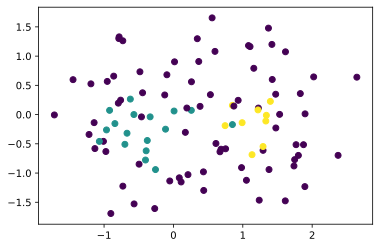

In [109]:
def getClusters(umap):
    hdbscan = HDBSCAN(min_cluster_size=5)
    clusters = hdbscan.fit_predict(umap_df)
    return clusters

plt.scatter(umap_df.emb_1, umap_df.emb_2, c=get_clusters(umap_df))

word_clusters = get_clusters(umap_df)

In [113]:
def articlesinClusters(clusters):  
    return file_unique_urls.title[word_clusters==clusters]

articlesinClusters(0)

168    How Blockchain Could Create Incentives to Prot...
224    Apollon Network - The Masternode Hosting Servi...
509    Introduction to Machine Learning and Different...
573           Time Series Forecasting with TensorFlow.js
605                                     Last Week in AI1
628                            My Time at NUS, Singapore
644    The Real World Potential and Limitations of Ar...
652    From liberal arts to AI: Here how this technol...
667    ð® AI & science; Apple & Ive; job transition...
675              How Likely Is Your Job to be Automated?
699    How a Bunch of Little Pitching Tweaks Helped T...
707    The Problemeter: A sheet that helps startups s...
715    Why Your Tech Project Can Fail and How to Avoi...
730    4 Ways Startups Can Overcome Implementation Ch...
738    Why an Executive MBA Program Was Right for My ...
778    Stick and Move: Strategies for Fighting Techni...
786    Examination of Tristan Harris for the Disinfor...
Name: title, dtype: object

In [92]:
hdbscan = HDBSCAN(min_cluster_size=5)

clusters = hdbscan.fit(umap_df)
clusters.outlier_scores_


array([0.4253456 , 0.35532371, 0.04647314, 0.29386543, 0.36706536,
       0.15210612, 0.37472886, 0.20601671, 0.37215532, 0.39799675,
       0.5011646 , 0.22291907, 0.32157521, 0.55493545, 0.34286837,
       0.11109901, 0.19198117, 0.        , 0.291091  , 0.24193491,
       0.        , 0.31336062, 0.09045879, 0.34140609, 0.13746242,
       0.03204937, 0.        , 0.13746242, 0.2136784 , 0.06111122,
       0.14842616, 0.10651304, 0.09848337, 0.22291907, 0.        ,
       0.07616841, 0.        , 0.04901706, 0.10620711, 0.2097445 ,
       0.        , 0.14957594, 0.08877376, 0.        , 0.20506682,
       0.        , 0.03204937, 0.        , 0.11869007, 0.51232067,
       0.37290551, 0.25989151, 0.21417596, 0.20063013, 0.25497454,
       0.25702026, 0.10975763, 0.18756791, 0.22058194, 0.284066  ,
       0.07568533, 0.09848337, 0.26480996, 0.13444096, 0.24244119,
       0.03180324, 0.24826583, 0.20547392, 0.11444227, 0.07317399,
       0.3515925 , 0.07345366, 0.10222407, 0.        , 0.38906

In [93]:
from mpl_toolkits.mplot3d import Axes3D 

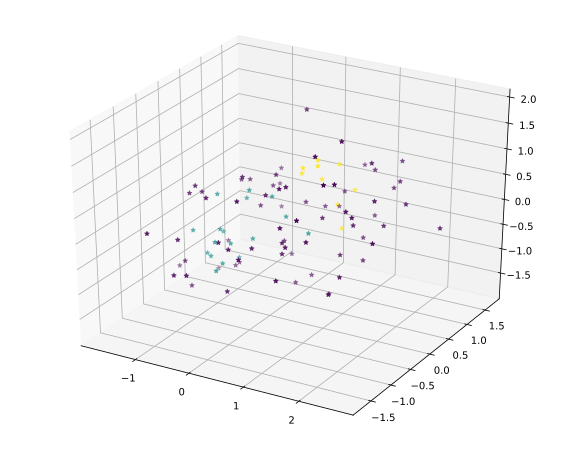

In [107]:
fig= plt.figure(figsize=(10,8))
ax= fig.add_subplot(111, projection='3d')
ax.scatter(umap_df.emb_1, umap_df.emb_2, umap_df.emb_3, marker='*' ,c=get_clusters(umap_df), s=20)
plt.show()          